In [ ]:
Aim: To implement k-means Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

In [10]:
dataset = pd.read_csv('C:/Users/zaidb/OneDrive/Desktop/Program/ML_Programs/datasets/iris.csv')

In [4]:
x = dataset.iloc[:, [0,1,2,3]].values

/Users/rahul/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


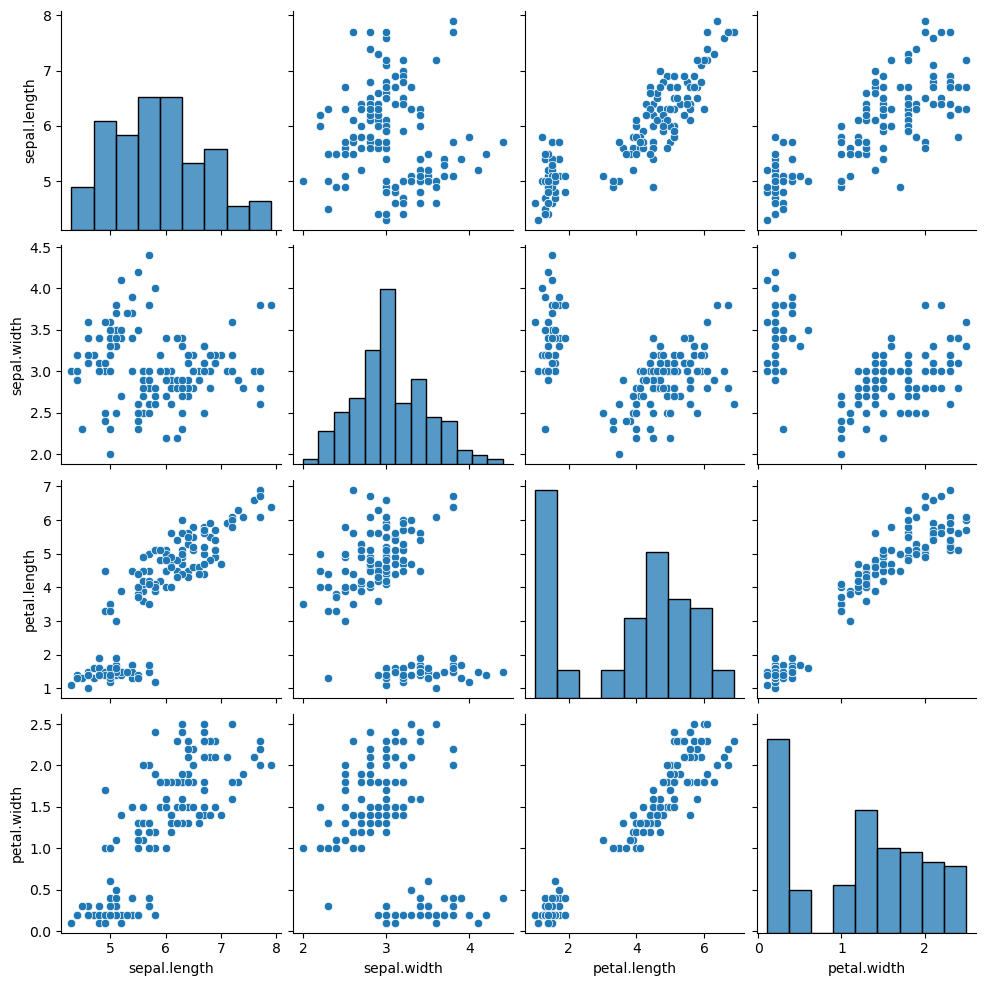

In [5]:
sns.pairplot(dataset)

In [6]:
Elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, random_state = 20)
    kmeans.fit(x)
    Elbow.append(kmeans.inertia_)

/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

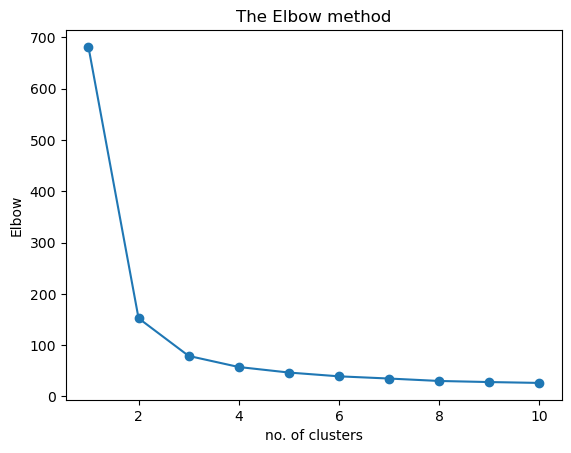

In [7]:
plt.plot(range(1, 11), Elbow, marker = "o")
plt.title("The Elbow method")
plt.xlabel("no. of clusters")
plt.ylabel("Elbow")
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3, init ="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

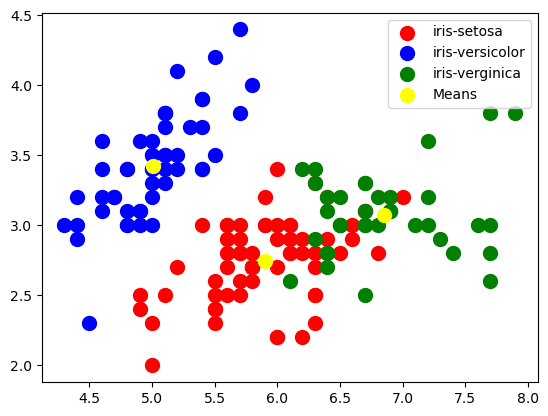

In [9]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = "iris-setosa")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = "iris-versicolor")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = "iris-verginica")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "yellow", label = "Means")
plt.legend()

In [22]:
distance_matrix = linkage(x, method = "ward", metric = "euclidean")

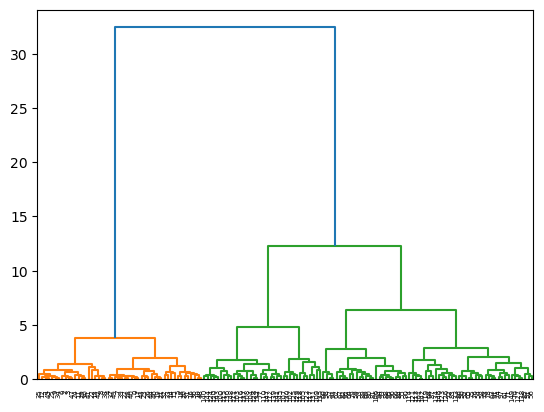

In [24]:
dn = dendrogram(distance_matrix)

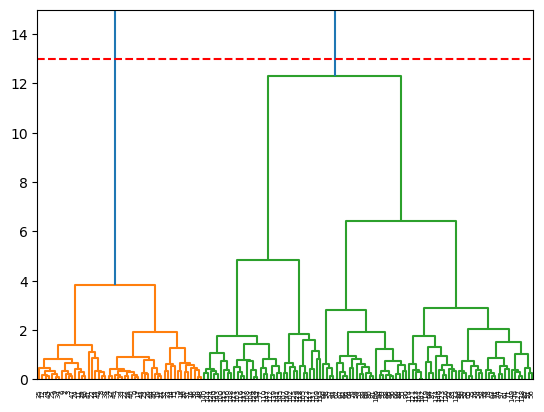

In [28]:
dn = dendrogram(distance_matrix)
plt.axhline(y = 13, color = "r", linestyle = "--")
plt.ylim(0,15)
plt.show()

/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0, 0.5, 'Petal Width')

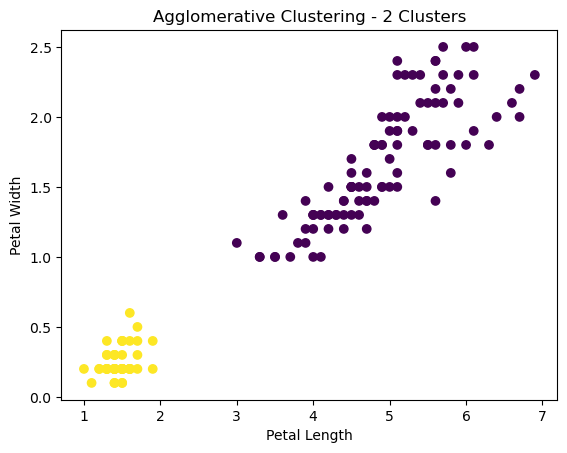

In [35]:
cluster = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster.fit_predict(x)
plt.title("Agglomerative Clustering - 2 Clusters")
plt.scatter(x[:, 2],x[:, 3], c= cluster.labels_, label = cluster.labels_)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0, 0.5, 'Petal Width')

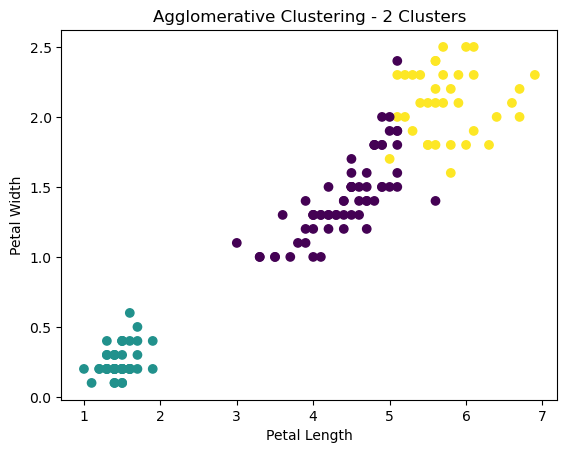

In [34]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
cluster.fit_predict(x)
plt.title("Agglomerative Clustering - 2 Clusters")
plt.scatter(x[:, 2],x[:, 3], c= cluster.labels_, label = cluster.labels_)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")